# **Importing The Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Importing the Dataset**

In [ ]:
dataset = pd.read_csv('spam.csv', encoding='ISO-8859-1')
print(dataset)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# **Refining Data**

In [ ]:
dataset.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
dataset.rename(columns={'v1':'Spam/Ham', 'v2':'Messages'}, inplace=True)
dataset = dataset.where((pd.notnull(dataset)), ' ')

In [ ]:
print(dataset)
dataset.info()

     Spam/Ham                                           Messages
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham              Will Ì_ b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Spam/Ham

# **Converting Spam/Ham to Numerical Data**

In [ ]:
dataset.loc[dataset['Spam/Ham'] == 'spam', 'Spam/Ham'] = 1
dataset.loc[dataset['Spam/Ham'] == 'ham', 'Spam/Ham'] = 0

In [ ]:
print(dataset)

     Spam/Ham                                           Messages
0           0  Go until jurong point, crazy.. Available only ...
1           0                      Ok lar... Joking wif u oni...
2           1  Free entry in 2 a wkly comp to win FA Cup fina...
3           0  U dun say so early hor... U c already then say...
4           0  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567        1  This is the 2nd time we have tried 2 contact u...
5568        0              Will Ì_ b going to esplanade fr home?
5569        0  Pity, * was in mood for that. So...any other s...
5570        0  The guy did some bitching but I acted like i'd...
5571        0                         Rofl. Its true to its name

[5572 rows x 2 columns]


# **Seperating Dataset**

In [ ]:
X = dataset['Messages']
Y = dataset['Spam/Ham']

In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Messages, Length: 5572, dtype: object


In [ ]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Spam/Ham, Length: 5572, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


# **Convert messages into numerical data**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
msg_extract = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)
train_features = msg_extract.fit_transform(X_train)
test_features = msg_extract.transform(X_test)

In [ ]:
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [ ]:
print(X_train)

1658    RGENT! This is the 2nd attempt to contact U!U ...
1509    When u love someone Dont make them to love u a...
3266                    Ok then i come n pick u at engin?
5199           Ugh my leg hurts. Musta overdid it on mon.
3217      Don know:)this week i'm going to tirunelvai da.
                              ...                        
3046    Ok. Not much to do here though. H&M Friday, ca...
1725    You know there is. I shall speak to you in  &l...
4079    Sir, good morning. Hope you had a good weekend...
2254                              Ok. Me watching tv too.
2915      What time should I tell my friend to be around?
Name: Messages, Length: 4457, dtype: object


In [ ]:
print(train_features)

  (0, 547)	0.19152841010524888
  (0, 4294)	0.28644338819823545
  (0, 4441)	0.3004300201964308
  (0, 323)	0.20701507316885265
  (0, 1582)	0.3004300201964308
  (0, 2060)	0.28644338819823545
  (0, 17)	0.3004300201964308
  (0, 1170)	0.235861682013409
  (0, 255)	0.3004300201964308
  (0, 299)	0.3004300201964308
  (0, 7385)	0.17495047100609937
  (0, 1950)	0.18804107135562415
  (0, 1121)	0.22100170516704798
  (0, 419)	0.21064951354406
  (0, 5654)	0.3004300201964308
  (1, 4677)	0.39845583282426406
  (1, 3193)	0.2591671916327502
  (1, 4124)	0.3296434324793044
  (1, 7208)	0.19855109683473132
  (1, 4221)	0.23143613226832413
  (1, 2368)	0.4417441422204556
  (1, 4123)	0.6142291225048643
  (2, 2542)	0.725064435052481
  (2, 5067)	0.46348688962377765
  (2, 1877)	0.3715292831116183
  :	:
  (4454, 2748)	0.2300309211785976
  (4454, 776)	0.19922677591108967
  (4454, 3414)	0.22227798914184893
  (4454, 3983)	0.16274117830861917
  (4454, 4482)	0.1632428077377904
  (4454, 7269)	0.1907605281605737
  (4454, 5987

# **Model Building(LOGISTIC REGRESSION)**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
regressor = LogisticRegression()

In [ ]:
regressor.fit(train_features, Y_train)

LogisticRegression()

# **Training Data Prediction and Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
train_pred = regressor.predict(train_features)
train_acc = accuracy_score(Y_train, train_pred)

In [ ]:
print("Accuracy: ", train_acc)

Accuracy:  0.9685887368184878


# **Test data Prediction and accuracy**

In [ ]:
test_pred = regressor.predict(test_features)
test_acc = accuracy_score(Y_test, test_pred)

In [ ]:
print("Accuracy: ", test_acc)

Accuracy:  0.9659192825112107


# **Data Visualization**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

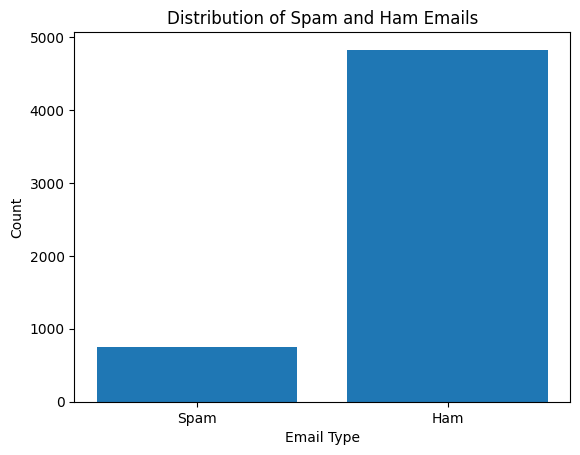

In [ ]:
spam_count = dataset[dataset['Spam/Ham'] == 1].shape[0]
ham_count = dataset[dataset['Spam/Ham'] == 0].shape[0]

plt.bar(['Spam', 'Ham'], [spam_count, ham_count])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Emails')
plt.show()

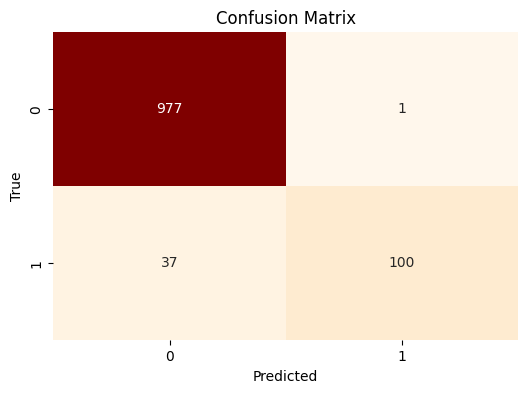

In [ ]:
cmat = confusion_matrix(Y_test, test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cmat, annot=True, fmt="d", cmap='OrRd', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Testing the Predictions**

In [ ]:
input_your_mail = ["Congratulations! You have won a free vacation to an USA and Canada. Click the link to claim your prize now!"]
input_data_features = msg_extract.transform(input_your_mail)
prediction = regressor.predict(input_data_features)
print(prediction)

if (prediction)[0] == 0:
  print("Ham Mail")
else:
  print("Spam Mail")

[1]
Spam Mail
